In [72]:
import pandas as pd
import matplotlib.pyplot as plt
#Graphing libraries
#import for seaborn graphs
import seaborn as sns
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objs as go
import plotly.io as pio
pio.templates.default = "plotly_dark"


In [73]:
#Retriveing the data from Output folder and combining into the dataframe and assigning variables
#using loop to retrives 5 csv files.
years = [x for x in range(2015,2020)]
df={}
for year in years:
    url = f"../UWA-Project/Output/{year}.csv"
    pd.set_option("display.max_rows",800)
    df[year] = pd.read_csv(url)
#Retreivng the concated csv file    
url_concat = f"../UWA-Project/Output/concated_df.csv"
df_concat = pd.read_csv(url_concat)
#Unpacking the dataframe
df_2015,df_2016,df_2017,df_2018,df_2019 = df[2015],df[2016],df[2017],df[2018],df[2019]

In [75]:
df[2016].tail(10)

,Country,Happiness_Rank,Happiness_Score,Economy_(GDP_per_Capita),Family,Health_(Life_Expectancy),Freedom,Trust_(Government_Corruption),Generosity,Dystopia_Residual
147,Madagascar,148,3.695,0.27954,0.46115,0.37109,0.13684,0.07506,0.22040,2.15075
148,Tanzania,149,3.666,0.47155,0.77623,0.35700,0.31760,0.05099,0.31472,1.37769
149,Liberia,150,3.622,0.10706,0.50353,0.23165,0.25748,0.04852,0.24063,2.23284
150,Guinea,151,3.607,0.22415,0.31090,0.18829,0.30953,0.11920,0.29914,2.15604
151,Rwanda,152,3.515,0.32846,0.61586,0.31865,0.54320,0.50521,0.23552,0.96819
152,Benin,153,3.484,0.39499,0.10419,0.21028,0.39747,0.06681,0.20180,2.10812
153,Afghanistan,154,3.360,0.38227,0.11037,0.17344,0.16430,0.07112,0.31268,2.14558
154,Togo,155,3.303,0.28123,0.00000,0.24811,0.34678,0.11587,0.17517,2.13540
155,Syria,156,3.069,0.74719,0.14866,0.62994,0.06912,0.17233,0.48397,0.81789
156,Burundi,157,2.905,0.06831,0.23442,0.15747,0.04320,0.09419,0.20290,2.10404


# Horizontal Bars

In [76]:
#Creating empty dictionioraing to hold top 10 and botton countries
top_10 = {}
bottom_10 = {}
combined_10 = {}

#using for loop to get the df for 5 years
for year in years:
        top_10[year] =df[year].set_index('Country')
        #Using loc for columns having significant factor for happiness score
        #Top 10 Countries
        top_10[year] = df[year].loc[:,['Country','Economy_(GDP_per_Capita)','Family', 'Health_(Life_Expectancy)',
       'Freedom', 'Trust_(Government_Corruption)', 'Generosity',
       'Dystopia_Residual']].head(10)
         #Using loc for columns having significant factor for happiness score
        #bottom 10 Countries
        bottom_10[year] = df[year].set_index('Country')
        bottom_10[year] = df[year].loc[:,['Country','Economy_(GDP_per_Capita)','Family', 'Health_(Life_Expectancy)',
       'Freedom', 'Trust_(Government_Corruption)', 'Generosity',
       'Dystopia_Residual']].tail(10)
        #combing to to and bottom to get in the same graphs
        combined_10[year] = pd.concat([bottom_10[year][::-1],top_10[year][::-1]]).set_index('Country',drop=True)
        fig =px.bar(combined_10[year], color_discrete_sequence = px.colors.colorbrewer.Paired,orientation='h',title= f'{year} Top-Bottom Analysis',barmode='stack', labels=dict(Country="Countries", value="Happiness Score", variable="Contributing Factors"))
        fig.show()


# Correlational Heatmaps

Cor-relational heatmap - 2015


<Figure size 720x432 with 0 Axes>

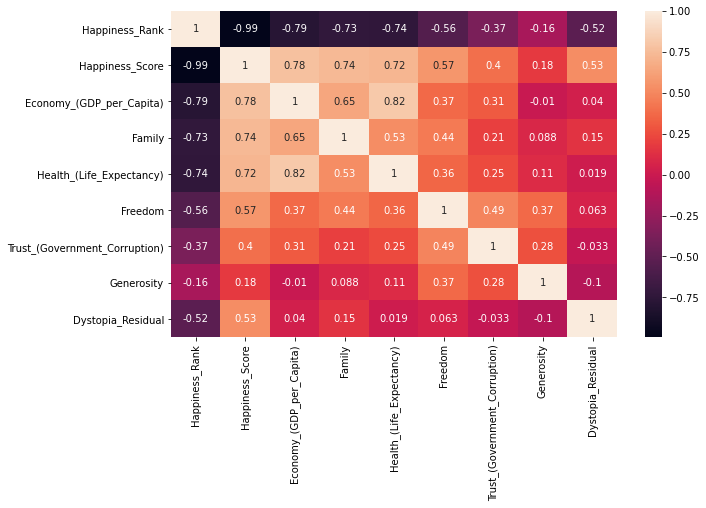

Cor-relational heatmap - 2016


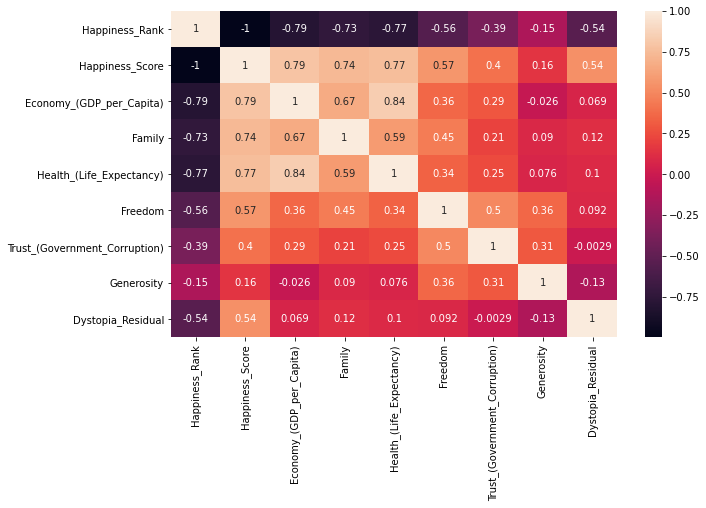

Cor-relational heatmap - 2017


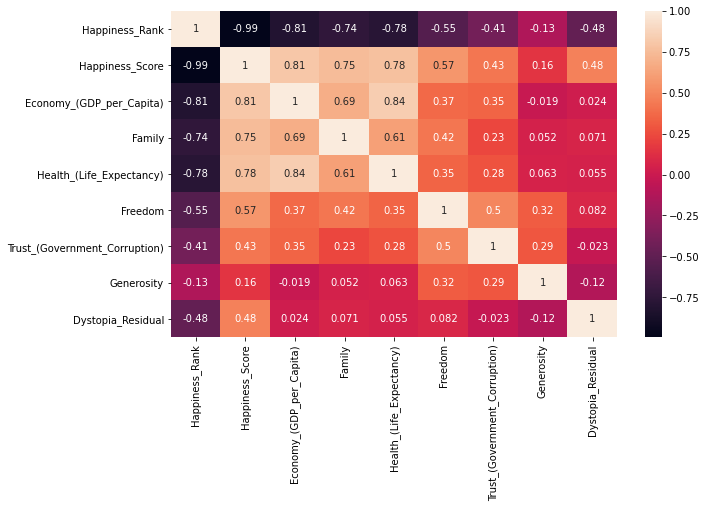

Cor-relational heatmap - 2018


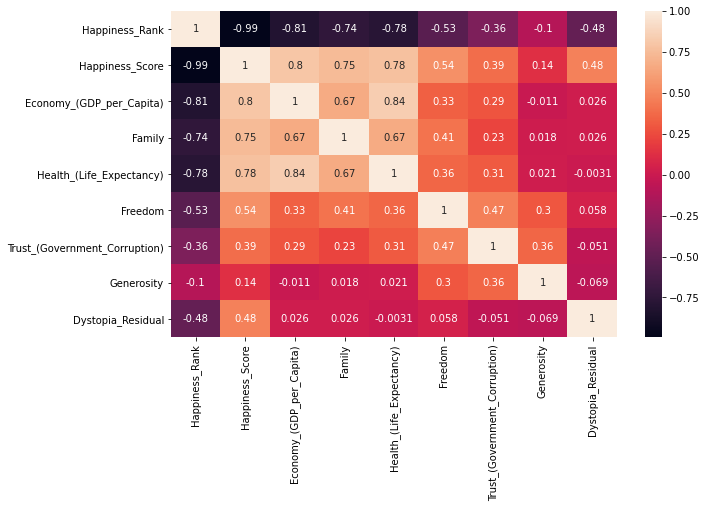

Cor-relational heatmap - 2019


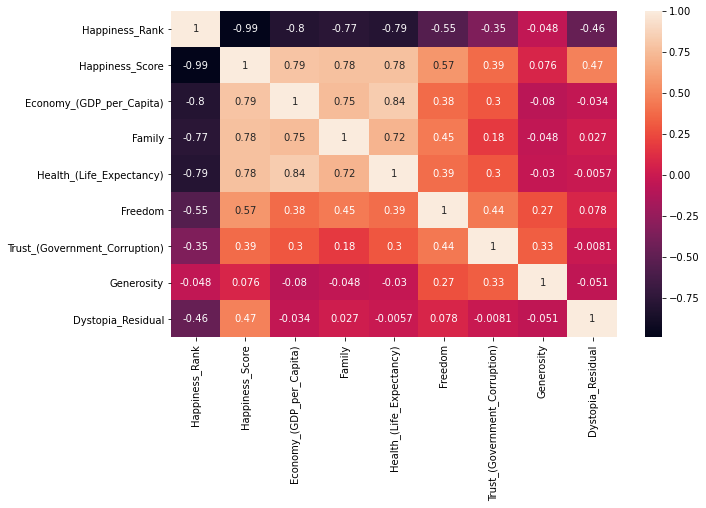

In [77]:
#deciding the size of graphs
plt.figure(figsize=(10,6))
heatmap_corr={}
# Using for loops to map co-relations grpahs for 5 years
for year in years:
    heatmap_corr[year] = df[year]
    fig = plt.figure(figsize=(10,6))
    print(f"Cor-relational heatmap - {year}")
    #Seaborn graphing using heatmap
    sns.heatmap(heatmap_corr[year].corr(), annot=True)
    plt.show()
    

    
    

### Spider Graphs

In [94]:

categories = ['Economy_(GDP_per_Capita)', 'Family', 'Health_(Life_Expectancy)',
       'Freedom', 'Trust_(Government_Corruption)', 'Generosity']
#plotlly function for go graphs
fig = go.Figure()
#empty dictionary to hold australian column values for the seven aforementioned categories
aus_data ={}
top_data = {}
country_name = {}
for year in years:
    #filtering out australian rows every years
    aus_data[year] = df[year].loc[df[year]['Country']=='Australia'].values
    #filtering out the top country values for evry years
    top_data[year]  = df[year].iloc[0,:].values
    #storing country name for all the years
    country_name[year]  = top_data[year][0]
  
    
fig.add_trace(go.Scatterpolar(
    #plotting top country data for 2019
          r=top_data[2019][3:-1],
    #adding afforentioned categories
          theta=categories,
          fill='toself',
          name=f'{country_name[year]}'
    ))
fig.add_trace(go.Scatterpolar(
    #plotting autrlaia data for 2019
          r=aus_data[2019][0][3:-1],
          theta=categories,
          fill='toself',
          name='Australia'
    ))

fig.update_layout(
      polar=dict(
        radialaxis=dict(
          visible=True,
          range=[0, 2]
        )),
      title=f"{country_name[2019]} vs. Australia - 2019",
      showlegend=True
    )

fig.show()



In [83]:
fig = go.Figure()
   
fig.add_trace(go.Scatterpolar(
    #plotting top country data for 2015
          r=top_data[2015][3:-1],
          theta=categories,
          fill='toself',
          name=f'{country_name[2015]}'
    ))
fig.add_trace(go.Scatterpolar(
    #plotting autrlaia data for 2015
          r=aus_data[2015][0][3:-1],
          theta=categories,
          fill='toself',
          name='Australia'
    ))

fig.update_layout(
      polar=dict(
        radialaxis=dict(
          visible=True,
          
          range=[0, 2]
        )),
       title=f"{country_name[2015]} vs. Australia - 2015",
      showlegend=True
    )

fig.show()



### True Factor Graph

In [96]:
#fill True Factor column by finding the max value from the database
df_concat['True_Factor']=df_concat.loc[:,['Economy_(GDP_per_Capita)','Family','Health_(Life_Expectancy)','Freedom','Trust_(Government_Corruption)','Generosity']].idxmax(axis=1)

In [98]:
#plotly chrolopleth graph
fig = px.choropleth(df_concat,  locations='Country',locationmode='country names', color='True_Factor',
                           color_continuous_scale="Viridis",
                           range_color=(0, 12),
                           scope="world",
                    animation_frame = 'year',
                           labels={'True_Factor':'True Factor'}
                          )

fig.show()